# Chapter 1 Transfer Learning (VGG)

## 1.1.1 ImageNet Dataset & VGG-16 Model

### 1) ImageNet Dataset

ImageNet Dataset은 MNIST, CIFAR 데이터셋과 더불어 굉장히 유명한 데이터셋이다. 다른 두 개의 데이터셋은 굉장히 작은 데이터셋으로 아이디어 검증에 사용된다.

* MNIST: 28x28 손글씨 사진 (학습 데이터 6만 장, 테스트 데이터 1만 장)  
    ![출처: https://www.google.com/url?sa=i&url=https%3A%2F%2Fko.wikipedia.org%2Fwiki%2FMNIST_%25EB%258D%25B0%25EC%259D%25B4%25ED%2584%25B0%25EB%25B2%25A0%25EC%259D%25B4%25EC%258A%25A4&psig=AOvVaw05FlDMkezOEfvgGw6PkpA6&ust=1629965252703000&source=images&cd=vfe&ved=0CAoQjRxqFwoTCJDVo_fby_ICFQAAAAAdAAAAABAD](images/MnistExamples.png)

* CIFAR-10: 10개의 클래스로 구분된 32x32 사물 사진 (학습 데이터 5만 장, 테스트 데이터 1만 장)  
    ![출처: https://www.google.com/url?sa=i&url=https%3A%2F%2Fgithub.com%2Fdnddnjs%2Fpytorch-cifar10&psig=AOvVaw0s2ba3rx9gg6a7iOhwcexL&ust=1629965198624000&source=images&cd=vfe&ved=0CAoQjRxqFwoTCNjb593by_ICFQAAAAAdAAAAABAV](images/cifar-10.jpg)

반면, ImageNet 데이터셋은 대표적인 대규모 데이터셋이다. 전체 데이터셋에 포함된 이미지는 1,000만 장이 넘으며 이는 Amazon Mechanical Turk 서비스를 이용하여 일일이 사람이 분류한 데이터셋이다. 이에 대한 간략한 설명은 다음과 같다.

* ImageNet Dataset: 스탠포드 대학교에서 인터넷 화상을 수집해 분류한 데이터셋으로 ILSVRC(ImageNet Large Scale Visual Recognition Challenge)대회에서 사용  
    ![출처: https://www.google.com/url?sa=i&url=https%3A%2F%2Fdevopedia.org%2Fimagenet&psig=AOvVaw0Id-a6a10d8h0KDF4m-f1A&ust=1629965635671000&source=images&cd=vfe&ved=0CAoQjRxqFwoTCOjOv6ndy_ICFQAAAAAdAAAAABAD](images/imagenet.png)

특히 PyTorch는 ImageNet 데이터셋 중 ILSVRC2012 데이터셋(클래스: 1천 개, 학습 데이터: 120만 장, 검증 데이터: 5만 장, 테스트 데이터: 10만 장)으로 신경망의 parameter를 학습한 다양한 모델을 사용할 수 있다.

### 2) VGG-16 Model

VGG-16 모델은 2014년 ILSVRC에서 2위를 차지한 합성곱 신경망이다. (비록 우승은 GoogleNet이었지만, 구조의 간결함과 사용의 편이성으로 인해 VGG-16이 GoogleNet보다 더 각광받았다.) 옥스포드 대학교의 VGG팀이 제작하였으며 16층으로 구성되었기때문에 VGG-16으로 불린다. 11, 13, 19층 버전의 모델도 존재하며 구성이 간단하기 때문에 다양한 딥러닝 응용 기술의 기반 네트워크로 사용한다. 

![출처: https://bskyvision.com/504](images/vggnet.png)

## 1.1.2 Prepare Projects

### 1) Make Directories

```sh
mkdir data
mkdir utils
```

### 2) Download Image

```sh
cd data
wget https://cdn.pixabay.com/photo/2018/10/05/02/26/goldenretriever-3724972_960_720.jpg
```

### 3) Install Package (For Arch based Distros)

```sh
# Install PyTorch (SIMD)
yay -S python-pytorch-opt
yay -S python-pillow-simd
yay -S libpng

# Install torchvision
git clone https://github.com/pytorch/vision
cd vision
python setup.py install --user
```

## 1.1.4 Import Packages

In [1]:
import numpy as np
import json
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torchvision
from torchvision import models, transforms

In [2]:
# Check Versions
print("PyTorch Version: ", torch.__version__)
print("Torchvision Version: ", torchvision.__version__)

PyTorch Version:  1.9.0
Torchvision Version:  0.11.0a0+b72129c


## 1.1.5 Read VGG-16

In [3]:
# Create an instance of VGG-16
net = models.vgg16(pretrained=True)
net.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

* VGG-16의 네트워크 구성은 `features`와 `classifier` 두 모듈로 구성되어 있으며, 각 모듈 속에 합성곱(Convolution) 층과 전결합(Linear) 층이 있다. 
    ![출처: https://neurohive.io/en/popular-networks/vgg16/](images/vgg16.png)
    
  
* VGG-16이 16계층이란 것은 Activation(ReLU), Pooling, Dropout을 제외한 Convolution layer와 Linear Layer 수를 말하는 것이다.

In [4]:
# Torch summary (`pip install torchsummary`)
from torchsummary import summary as summary_

In [5]:
summary_(net, input_size=(3, 224, 224), device="cpu")

/usr/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /build/python-pytorch/src/pytorch-1.9.0-opt/c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

### 번외 - Convolution & Pooling

Convolution은 이미지에서 Feature를 추출할 때 사용되는 방법이다. 일반적으로 이미지보다 작은 Kernel을 가지고 이미지를 순회하면서 내적하여 구한 Scalar 값을 모아 이미지를 축소한다.

![출처: Deep Learning with PyTorch](images/convolution.png)

![출처: https://gaussian37.github.io/dl-concept-covolution_operation/](images/conv.gif)

Pooling은 summary statistics를 사용하여 이미지를 resizing하는 연산이다. 대표적으로는 Max pooling과 Mean pooling이 사용된다. Convolution과 다르게 Pooling에는 가중치가 사용되지 않으며 채널 수가 변하지 않는다.

![출처: Deep Learning with PyTorch](images/maxpool.png)


#### 1) Download CIFAR-10 & ToTensor

In [6]:
#!mkdir -p "data/cifar10"

In [7]:
# Downloading CIFAR-10
from torchvision import datasets
data_path = "data/cifar10/"
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [8]:
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [9]:
len(cifar10)

50000

In [10]:
len(cifar10_val)

10000

In [11]:
img, label = cifar10[99]
img, label

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F130DB853D0>, 1)

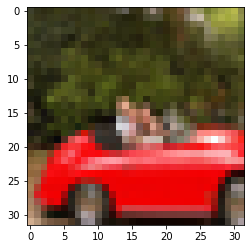

In [12]:
plt.imshow(img)
plt.show()

In [13]:
to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape # 3-channel(RGB) 32x32 image

torch.Size([3, 32, 32])

In [14]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False, transform=transforms.ToTensor())

In [15]:
img_t, _ = tensor_cifar10[99]
type(img_t)

torch.Tensor

In [16]:
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

In [17]:
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

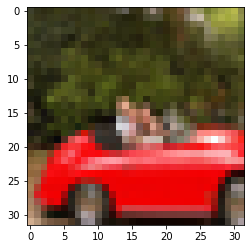

In [18]:
plt.imshow(img_t.permute(1, 2, 0)) # CxHxW -> HxWxC
plt.show()

#### 2) Normalization

In [19]:
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [20]:
imgs.view(3,-1).shape # 3x?: ?는 PyTorch가 알아서 맞춤

torch.Size([3, 51200000])

In [21]:
imgs.view(3, -1).mean(dim=1) # (3,51200000) -> mean -> (3,)

tensor([0.4914, 0.4822, 0.4465])

In [22]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [23]:
transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.2435, 0.2616))

In [24]:
# With ToTensor
transformed_cifar10 = datasets.CIFAR10(
    data_path,
    train=True,
    download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(
            (0.4914, 0.4822, 0.4465),
            (0.2470, 0.2435, 0.2616)
        )
    ])
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


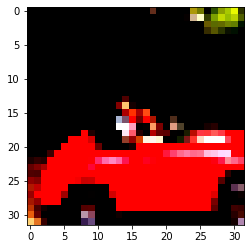

In [25]:
img_t, _ = transformed_cifar10[99]

plt.imshow(img_t.permute(1, 2, 0))
plt.show()

#### 3) Convolution

In [26]:
from torch import nn

In [27]:
conv = nn.Conv2d(3, 16, kernel_size=3)
conv

Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))

In [28]:
conv.weight.shape, conv.bias.shape

(torch.Size([16, 3, 3, 3]), torch.Size([16]))

In [29]:
img, _ = tensor_cifar10[99]
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 16, 30, 30]))

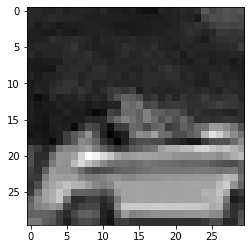

In [30]:
plt.imshow(output[0,0].detach(), cmap='gray')
plt.show() # We lost a few pixels!

#### 4) Padding

In [31]:
conv = nn.Conv2d(3, 16, kernel_size=3, padding=1)
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 16, 32, 32]))

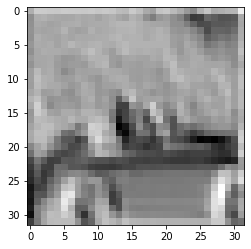

In [32]:
plt.imshow(output[0,0].detach(), cmap='gray')
plt.show()

In [33]:
# Edge detection
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)
with torch.no_grad():
    conv.weight[:] = torch.tensor([
        [-1.0, -1.0, -1.0],
        [-1.0,  8.0, -1.0],
        [-1.0, -1.0, -1.0]
    ])
    conv.bias.zero_()

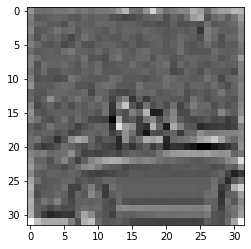

In [34]:
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape
plt.imshow(output[0,0].detach(), cmap='gray')
plt.show()

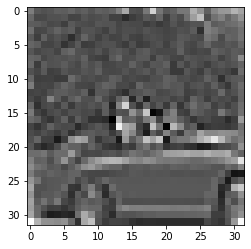

In [35]:
# Sharpen
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)
with torch.no_grad():
    conv.weight[:] = torch.tensor([
        [ 0.0, -1.0,  0.0],
        [-1.0,  5.0, -1.0],
        [ 0.0, -1.0,  0.0]
    ])
    conv.bias.zero_()
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape
plt.imshow(output[0,0].detach(), cmap='gray')
plt.show()

#### 5) Pooling

In [36]:
pool = nn.MaxPool2d(2)
output = pool(img.unsqueeze(0))

img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 3, 16, 16]))

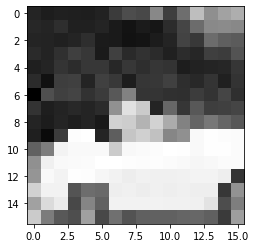

In [37]:
plt.imshow(output[0,0].detach(), cmap='gray')
plt.show()

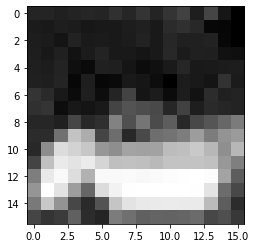

In [38]:
activate = nn.ReLU()
conv = nn.Conv2d(3, 16, kernel_size=3, padding=1)
output = conv(img.unsqueeze(0))
output = activate(output)
output = pool(output)

plt.imshow(output[0,0].detach(), cmap='gray')
plt.show()

## 1.1.6 Create Preprocess Class

In [39]:
class BaseTransform():
    """
    Attributes
    ----------
    resize:   int
    mean: (R,G,B)
    std:  (R,G,B)
    """
    def __init__(self, resize, mean, std):
        self.base_transform = transforms.Compose([
            transforms.Resize(resize),
            transforms.CenterCrop(resize),
            transforms.ToTensor(),
            transforms.Normalize(mean, std)
        ])
    
    def __call__(self, img):
        return self.base_transform(img)

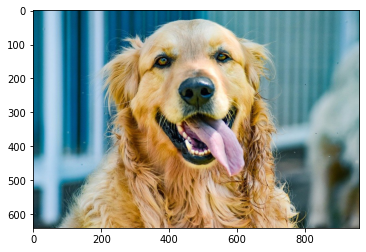

In [40]:
image_file_path = "./data/goldenretriever-3724972_960_720.jpg"
img = Image.open(image_file_path)

plt.imshow(img)
plt.show()

In [41]:
resize = 224
mean = (0.485, 0.456, 0.40)
std = (0.229, 0.224, 0.225)
transform = BaseTransform(resize, mean, std)
img_transformed = transform(img)
img_transformed.shape

torch.Size([3, 224, 224])

In [42]:
img_permuted = img_transformed.permute(1, 2, 0) # CHW -> HWC
img_permuted = np.clip(img_permuted, 0, 1)   # 0-1 제한

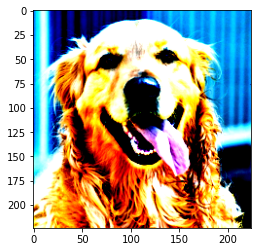

In [43]:
plt.imshow(img_permuted)
plt.show()

## 1.1.7 Create Post-process class

먼저 다음의 과정을 통해 `imagenet1000_clsidx_to_labels.txt`을 다운받자.

```sh
cd data
wget https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a/raw/238f720ff059c1f82f368259d1ca4ffa5dd8f9f5/imagenet1000_clsidx_to_labels.txt
```

In [44]:
class ILSVRCPredictor():
    def __init__(self, class_index):
        self.class_index = class_index
    
    def predict_max(self, out):
        maxid = torch.argmax(out).item()
        predicted_label_name = self.class_index[maxid]
        return predicted_label_name

## 1.1.8 Use pretrained VGG to predict

In [45]:
with open('./data/imagenet1000_clsidx_to_labels.txt', 'r') as f:
    idx2label = eval(f.read())
    
idx2label

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

In [46]:
predictor = ILSVRCPredictor(idx2label)

In [47]:
inputs = img_transformed.unsqueeze(0)
out = net(inputs)
result = predictor.predict_max(out)

In [48]:
print("입력 화상의 예측 결과: ", result)

입력 화상의 예측 결과:  golden retriever


## 1.2.1 Deeplearning Flow for PyTorch

1. 전처리, 후처리, 네트워크 모델의 입출력 확인

2. 데이터셋 작성

3. 데이터 로더 작성

4. 네트워크 모델 작성

5. 순전파 정의

6. 손실함수 정의

7. 최적화 기법 설정

8. 학습/검증 실시

9. 테스트 데이터로 추론

## 1.3.1 Transfer Learning

## 1.3.2 Prepare Data

```sh
cd data
wget "https://download.pytorch.org/tutorial/hymenoptera_data.zip"
unzip hymenoptera_data
```

## 1.3.3 Prerequisites

```shell
# For Arch
yay -S python-tqdm
```

## References

* 안경잡이개발자, [ImageNet 데이터셋 소개 및 다운로드하는 방법](https://ndb796.tistory.com/471)
